In [1]:
# Installing Required Packages
!pip install seaborn --quiet

# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix
import random


In [2]:
# Loading and Preprocessing MNIST Dataset
def load_data():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255
    x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255
    return x_train, y_train, x_test, y_test

# Load data
x_train, y_train, x_test, y_test = load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Building CNN Model with Dropout
def build_model():
    model = Sequential([
        Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
        MaxPooling2D(2,2),
        Dropout(0.25),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Training the Model
model = build_model()
history = model.fit(x_train, y_train, epochs=3, batch_size=64, validation_split=0.2)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
750/750 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.8213 - loss: 0.5678 - val_accuracy: 0.9743 - val_loss: 0.0928
Epoch 2/3
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 36ms/step - accuracy: 0.9588 - loss: 0.1395 - val_accuracy: 0.9803 - val_loss: 0.0681
Epoch 3/3
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 36ms/step - accuracy: 0.9686 - loss: 0.1032 - val_accuracy: 0.9831 - val_loss: 0.0593


In [4]:
# Saving the Trained Model
model.save("digit_model.h5")

# Predicting on Test Data
y_pred = np.argmax(model.predict(x_test), axis=1)

# Classification Report
print("📄 Classification Report:\n")
print(classification_report(y_test, y_pred))


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
📄 Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.98      0.98       892
           6       0.99      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



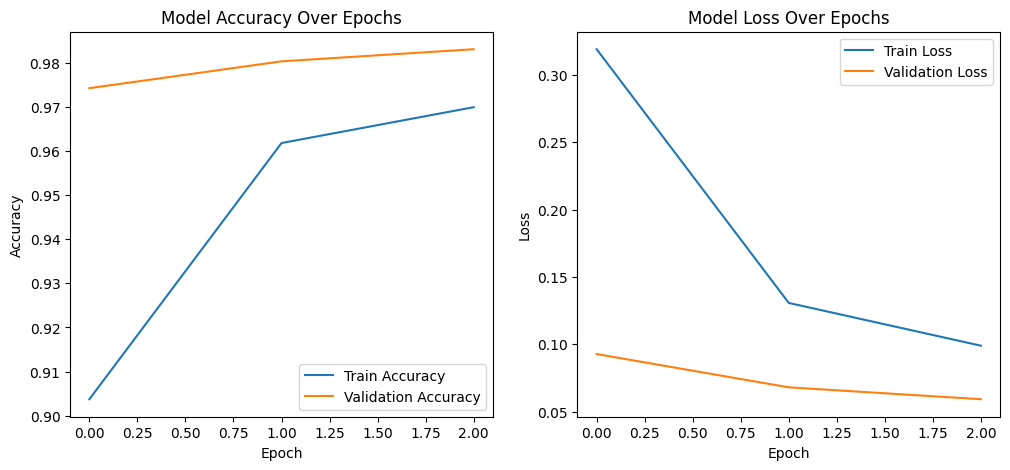

In [5]:
# Accuracy and Loss Graphs
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()


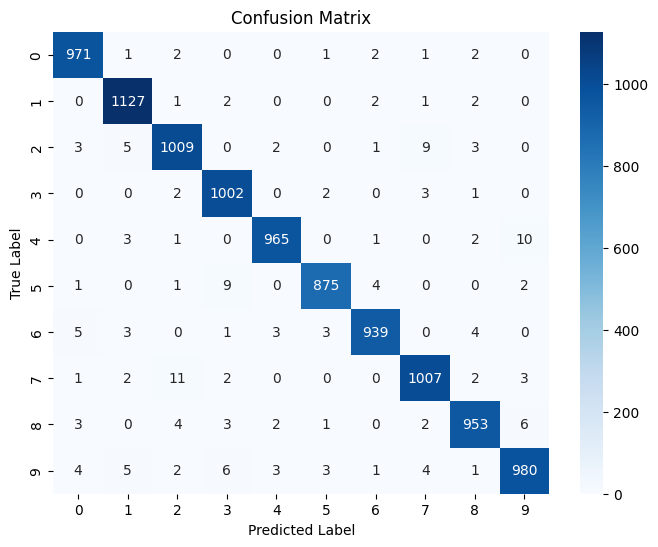

In [6]:
# Visualizing Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


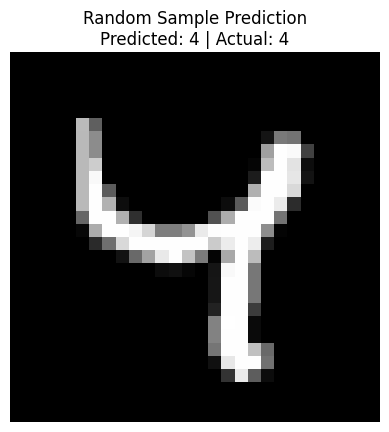

In [7]:
# Predicting a Random Sample
index = random.randint(0, len(x_test) - 1)
img = x_test[index]
actual = y_test[index]
prediction = np.argmax(model.predict(np.expand_dims(img, axis=0)))

plt.imshow(img.reshape(28, 28), cmap='gray')
plt.title(f"Random Sample Prediction\nPredicted: {prediction} | Actual: {actual}")
plt.axis('off')
plt.show()


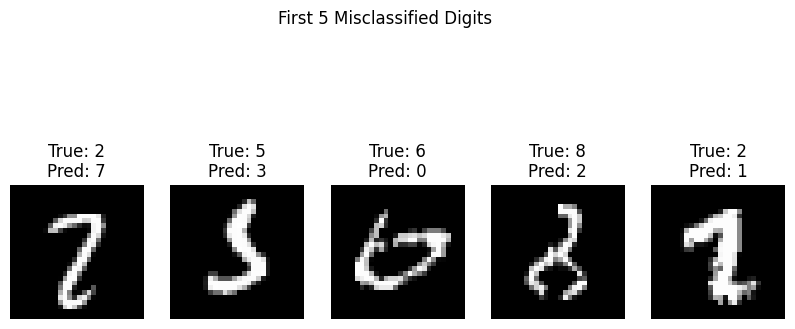

In [8]:
# Showing First 5 Misclassified Digits
wrong = np.where(y_pred != y_test)[0]

plt.figure(figsize=(10, 5))
for i, idx in enumerate(wrong[:5]):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test[idx]}\nPred: {y_pred[idx]}")
    plt.axis('off')

plt.suptitle("First 5 Misclassified Digits")
plt.show()
